# Medical Cost Personal Insurance Project

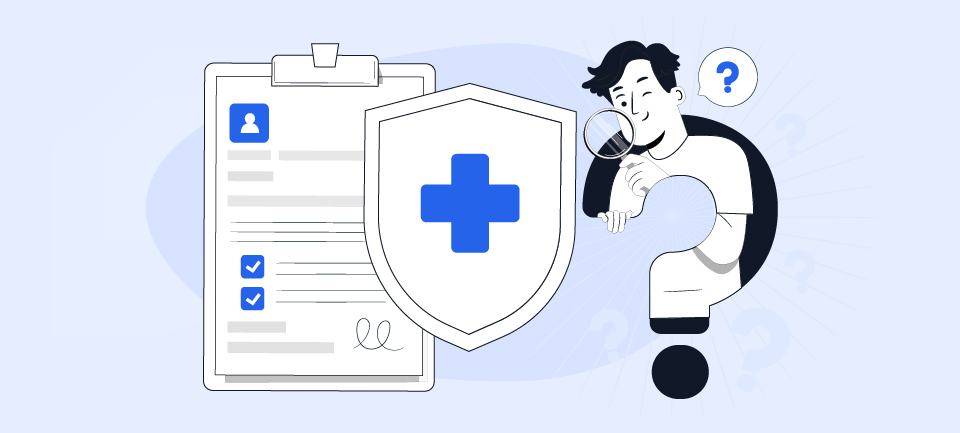

Dataset:

    The dataset contains 6 variables which determine the cost of medical insurance. 


Input variables:

    1 - age  
    2 - sex  
    3 - bmi 
    4 - children  
    5 - smoker  
    6 - region   
    
    
Output variable: 

      - charges  


Aim: 

    Analyse the Medical Insurance dataset  
    Develop a machine learning model to predict insurance costs (Regression model)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [13]:
med_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data pre-processing & EDA

In [4]:
med_df.shape

(1338, 7)

In [5]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations:  
No nulls are present.  
Datatypes of columns are: 
* float64 = bmi, charges
* int64 = age,children
* object = sex, smoker, region

In [7]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# check number of unique values in each feature column
unique=med_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
# take the count of each unique value in each feature column
for i in med_df.columns:
    print(med_df.value_counts(med_df[i]),'\n')

age
18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: count, dtype: int64 

sex
male      676
female    662
Name: count, dtype: int64 

bmi
32.300    13
28.310     9
30.875     8
31.350     8
28.880     8
          ..
28.800     1
28.490     1
28.380     1
28.200     1
53.130     1
Name: count, Length: 548, dtype: int64 

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64 

smoker
no     1064
yes     274
Name: count, dtype: int64 

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64 

charges
1639.56310     2
12741.16745    1
12

Observations:  
Majority of dataset is of people with age 18-19.  
Sex-proportion of dataset is equal.  
Majority of dataset have bmi = 32.3.  
Majority of dataset have no children.  
Majority population of the dataset are non-smokers.  
Region-proportion of dataset is equal.   
There are many unique values in the label column (charges) which increases the diversity of the data.

In [15]:
# check for duplicates
duplicates=med_df.duplicated()

print('No. of duplicates in the dataset: ', med_df.duplicated().sum())
print('Index of duplicates in the dataset: ', med_df[duplicates].index)

No. of duplicates in the dataset:  1
Index of duplicates in the dataset:  Index([581], dtype='int64')


In [16]:
# remove duplicated record
med_df.drop_duplicates(inplace=True)
print('No. of duplicates after cleaning: ', med_df.duplicated().sum())
print('No. of rows after cleaning: ', med_df.shape[0])

No. of duplicates after cleaning:  0
No. of rows after cleaning:  1337


In [18]:
# encode bmi 
def encode_bmi(bmi):
    if bmi<18.5:
        return 'Underweight'
    elif 18.5<=bmi<=24.9:
        return 'Healthy weight'
    elif 25<=bmi<=29.9:
        return 'Overweight'
    else:
        return 'Obese'

med_df['bmi_category']=med_df['bmi'].apply(encode_bmi)
med_df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


If your BMI is less than 18.5, it falls within the underweight range.

If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range.

If your BMI is 25.0 to 29.9, it falls within the overweight range.

If your BMI is 30.0 or higher, it falls within the obese range.

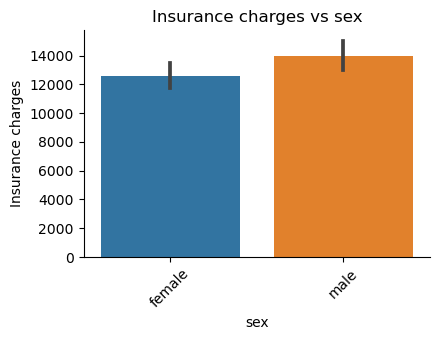

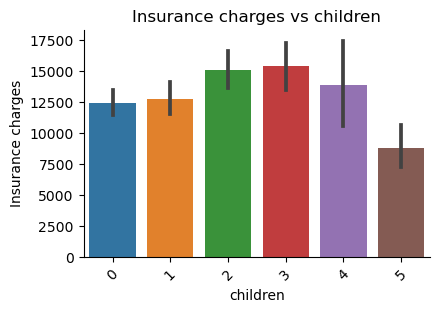

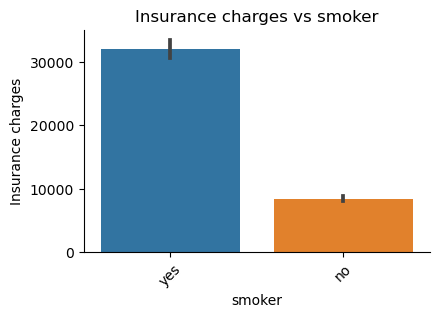

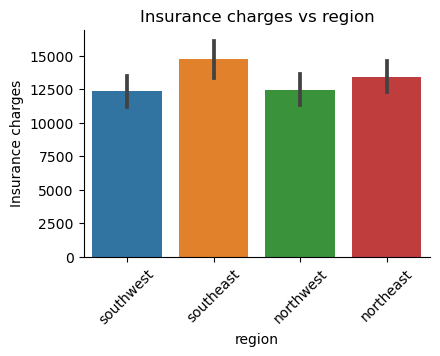

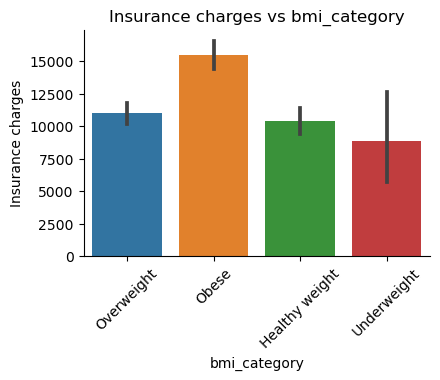

In [19]:
# bar plots of categorical features

cat=med_df[['sex','children','smoker','region','bmi_category']]
for i in cat:
    sns.catplot(x=i, y ='charges', data=med_df, kind='bar',height=3,aspect=1.5)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    plt.ylabel('Insurance charges')
    plt.title(f'Insurance charges vs {i}')
    plt.show()

Observations:  
    Men have been charged slightly higher insurance charges than women.  
    Insurance charges were slightly higher with people having 2-3 dependents.  
    Smokers have claimed majority of health insurance from the dataset and have been charged higher than non-smokers.  
    People from South-east region have been charged with the highest insurance bills.  
    Obese people tend to pay more charges for insurance.

In [20]:
# encode sex, smoker and region
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=med_df[['sex','smoker','region']]
for col in x.columns:
    med_df[col]=le.fit_transform(med_df[col])
    
med_df.head()    

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,0,27.900,0,1,3,16884.92400,Overweight
1,18,1,33.770,1,0,2,1725.55230,Obese
2,28,1,33.000,3,0,2,4449.46200,Obese
3,33,1,22.705,0,0,1,21984.47061,Healthy weight
4,32,1,28.880,0,0,1,3866.85520,Overweight


Encoded columns:  
    sex: male=1, female=0  
    smoker: yes=1, no=0  
    region: southwest=3, southeast=2, northwest=1, northeast=4  

Observation:
BMI and age have positive correlation with insurance charges.

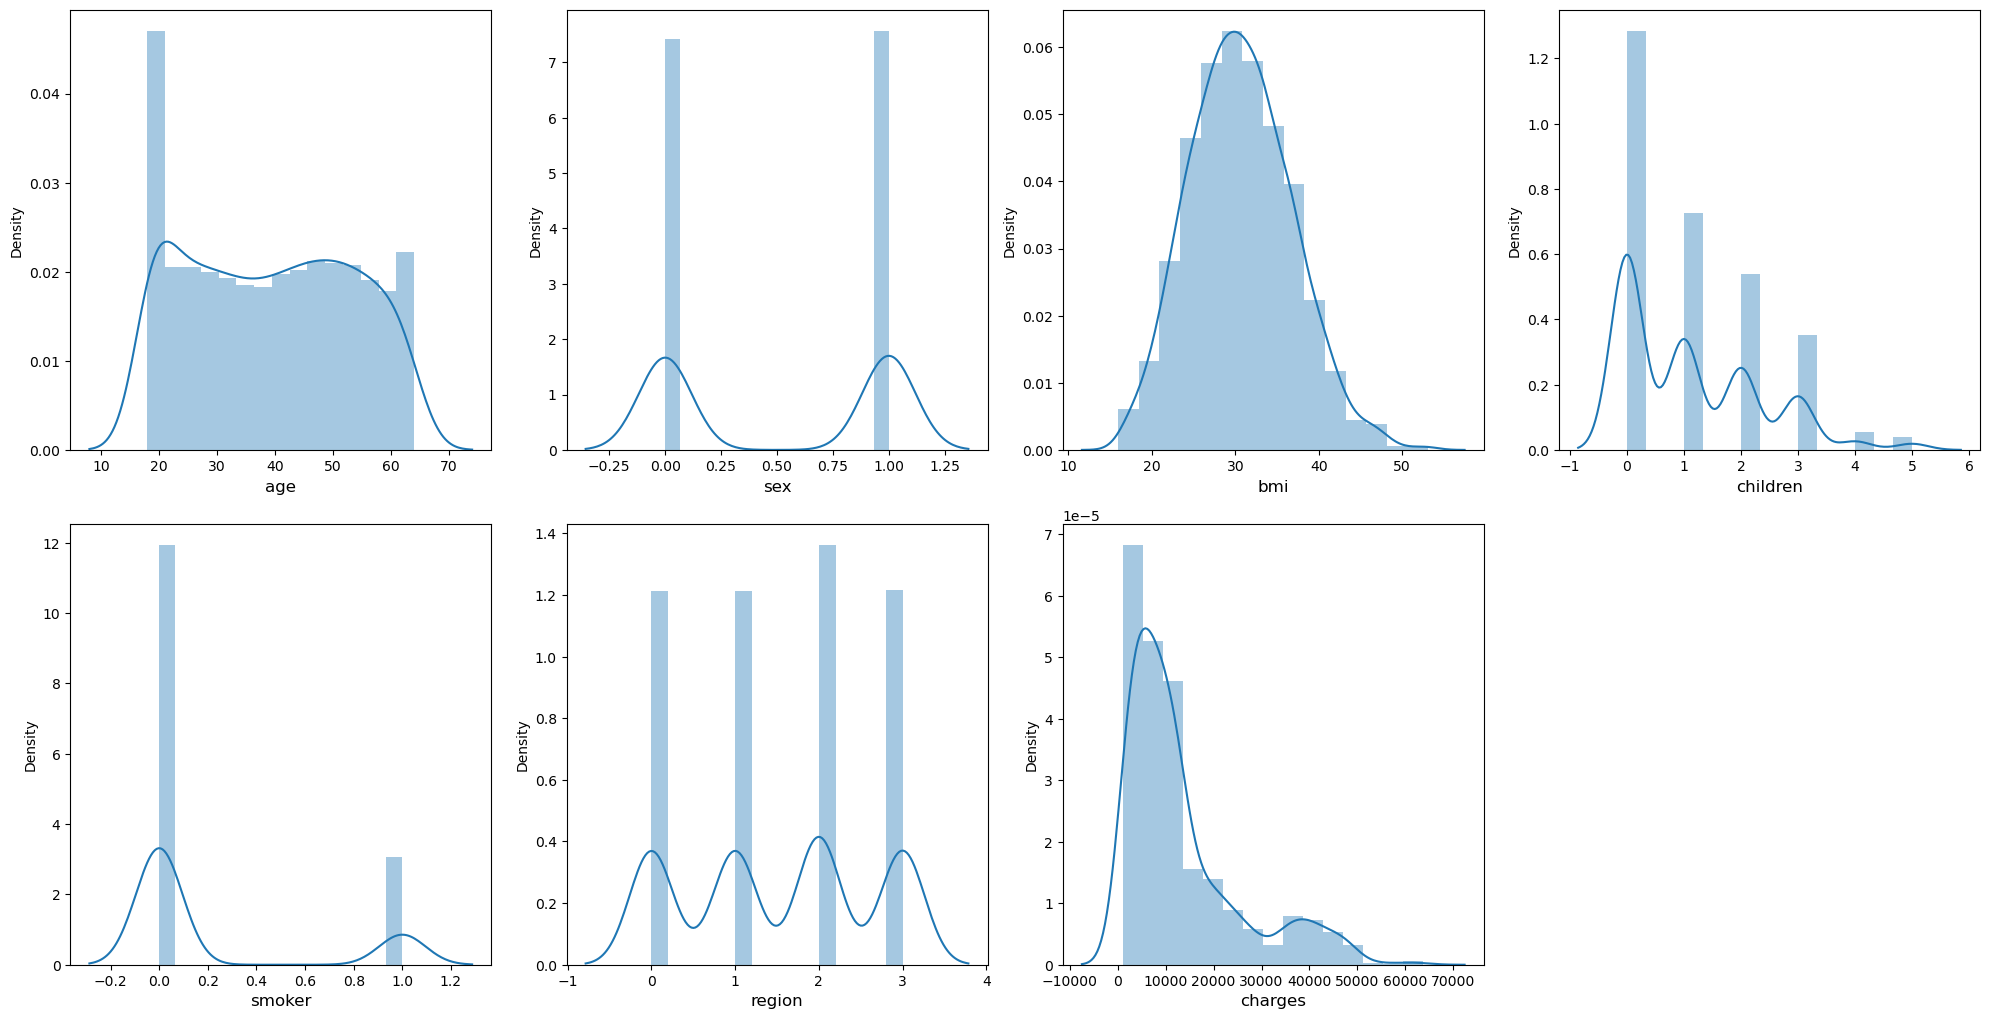

In [22]:
# data distribution

plt.figure(figsize=(20,15))
plot=1
for col in med_df:
    if plot<=7:
        ax=plt.subplot(3,4,plot)
        sns.distplot(med_df[col],bins=15)
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  
    Data is normally distributed

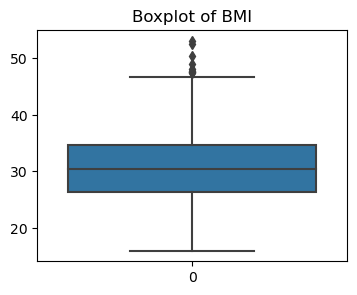

In [24]:
# check for outliers in quantitative feature using boxplot 
x=med_df['bmi']
plt.figure(figsize=(4,3))
sns.boxplot(x)
plt.title('Boxplot of BMI')
plt.show()

Observation:  
    Since highest bmi in the dataset is 53.13 and it is a possible measurement, we cannotm consider it as outlier. So outlier removal is not required.

In [26]:
med_df.drop('bmi_category',axis=1,inplace=True)

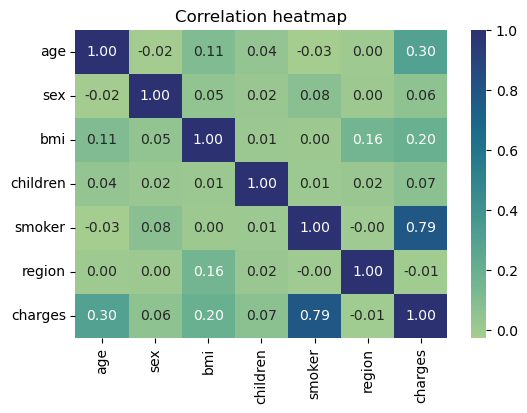

In [29]:
# check for correlation

cm= med_df.corr()
plt.figure(figsize=(6,4))

sns.heatmap(cm, annot=True,cmap='crest',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:  
    There is no multicollinearity observed. So all the features could be used for model building.  
    Insurance charges are highly positively correlated with smoking and have moderate positive correlation with age and bmi.
    

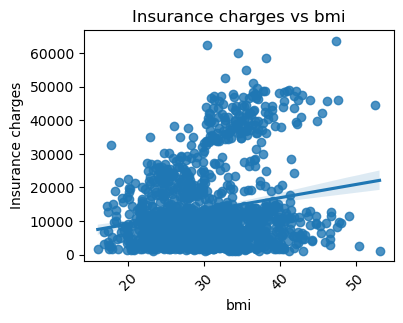

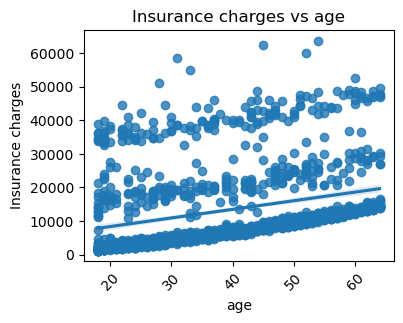

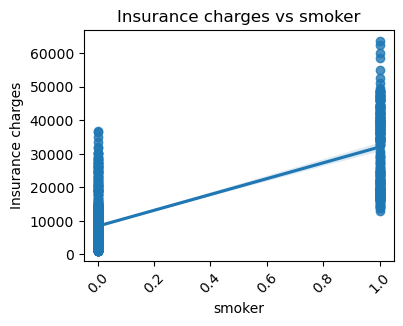

In [104]:
# scatter plot of bmi, age and smoking with insurance charges
x=med_df[['bmi','age','smoker']]

for col in x:
    plt.figure(figsize=(4,3))
    sns.regplot(data=med_df, x=med_df[col], y= med_df['charges'])
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.ylabel('Insurance charges')
    plt.title(f'Insurance charges vs {col}')

    plt.show()

# MODEL BUILDING & VALIDATION

In [71]:
# splitting dataset into training and testing sets
x=med_df.drop('charges',axis=1)
y=med_df['charges']

scaler = StandardScaler()
X_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,random_state=67)


print('x_train: ', x_train.shape,'\n','y_train: ',y_train.shape,'\n','x_test: ',x_test.shape,'\n','y_test: ',y_test.shape,'\n')

x_train:  (1002, 6) 
 y_train:  (1002,) 
 x_test:  (335, 6) 
 y_test:  (335,) 



In [72]:
# define functions for training and evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        print('R2 score: ',r2_score(y_test,y_pred2))

In [73]:
# linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7186862156515107


In [74]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
score(knr,x_train,y_train,x_test,y_test,train=True)
score(knr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7848109340256408


In [75]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7010639606425626


In [76]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8207223743948601


In [77]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
score(abr,x_train,y_train,x_test,y_test,train=True)
score(abr,x_train,y_train,x_test,y_test,train=False)


R2 score:  0.8005663266623368


In [78]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)
score(gbdt,x_train,y_train,x_test,y_test,train=True)
score(gbdt,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8337091233769103


In [79]:
# XGBoost
import xgboost as xgb
xgbr=xgb.XGBRegressor()
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7829108230856441


In [80]:
# SVM
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  -0.14404846691959428


In [40]:
# Evaluate the models based on metrics

models={'Linear Regression':lr, 'KNN':knr,'Decision Tree':dtr, 'Random Forest':rfr,'AdaBoost':abr,
        'Gradient Boosting':gbdt,'XGBoost':xgbr,'SVM':svr }

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        mse=mean_squared_error(y_test,y_pred2)
        mae=mean_absolute_error(y_test,y_pred2)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(r2-cv)
        model_metrics.append({'Model':name, 'R2 score':r2, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='R2 score' ,ascending=False)


In [41]:
evaluation(models)

,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
5,Gradient Boosting,0.834148,2.489124e+07,2691.711321,0.855592,0.021444
3,Random Forest,0.822558,2.663065e+07,2830.918514,0.835499,0.012941
4,AdaBoost,0.811532,2.828544e+07,3970.008892,0.817139,0.005607
1,KNN,0.784811,3.229572e+07,3476.818136,0.103545,0.681266
6,XGBoost,0.782911,3.258089e+07,3391.141405,0.806669,0.023758
0,Linear Regression,0.718686,4.221977e+07,4484.414944,0.747129,0.028442
2,Decision Tree,0.700607,4.493312e+07,3238.191975,0.708786,0.008179
7,SVM,-0.144048,1.716996e+08,8690.758019,-0.103743,0.040305


Observation:
    Gradient Boosting Regressor is seen as the best model among the 8 models for this regression task with:
    
       * R2 score: 0.833
       * Cross Validation: 0.855
       * MSE: 24,966,270
       * MAE: 2702.41
       * Diff btw R2 and CV scores: 0.02

In [93]:
# Hyperparameter tuning of Gradient Boosting Regressor model
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':range(2,8), 'min_samples_split': range(2,10), 'n_estimators': range(50,300,50),
        'learning_rate': [0.01,0.05,0.08,0.1,0.2,0.5]}
rs= RandomizedSearchCV(GradientBoostingRegressor(),param_distributions=params,cv=5,scoring='r2')
rs.fit(x_train,y_train)
print(f'Best parameters for Gradient Boosting Regressor model: {rs.best_params_} \n Best score: {rs.best_score_}')

Best parameters for Gradient Boosting Regressor model: {'n_estimators': 150, 'min_samples_split': 9, 'max_depth': 3, 'learning_rate': 0.05} 
 Best score: 0.8615541957334862


In [95]:
gbdt1=rs.best_estimator_
gbdt1.fit(x_train,y_train)

score(gbdt1,x_train,y_train,x_test,y_test,train=True)
score(gbdt1,x_train,y_train,x_test,y_test,train=False)

models={'Gradient Boosting':gbdt,'Tuned_GBDT': gbdt1}
evaluation(models)

R2 score:  0.834762056579039


,Model,R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned_GBDT,0.834762,2.479902e+07,2690.455972,0.857718,0.022956
0,Gradient Boosting,0.834169,2.488807e+07,2693.233372,0.855757,0.021588


Observation:  
    There was not much changes in r2 score after hyperparameter tuning (slight increase in r2 score). However, there was a slight decrease in MAE and slight increase in CV score.

In [97]:
# save the model
pickle.dump(gbdt1, open('Insurance_gbdt1.pkl','wb'))

In [101]:
# load model and view prediction vs actual charges
gb_model=pickle.load(open('Insurance_gbdt1.pkl','rb'))
y_pred=gb_model.predict(x_test)

result=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
result

,Predicted,Actual
944,13808.623847,12982.87470
96,12949.425266,12105.32000
1281,25132.227689,24535.69855
103,29880.323575,30942.19180
1252,19005.148108,16232.84700
...,...,...
594,6575.784046,5709.16440
548,3396.861672,3213.62205
671,4486.590039,3943.59540
1130,8655.332258,8582.30230


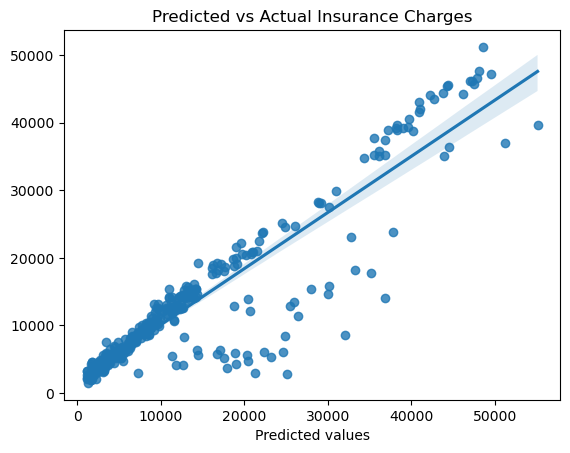

In [103]:
# plot Predicted vs Actual Insurance Charges
sns.regplot(x=y_test,y=y_pred,data=result)
plt.title('Predicted vs Actual Insurance Charges')
plt.xlabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

Observation:  
    The Gradient Boosting model was able to predict insurance charges closer to the actual charges with few exceptions as visible by the spread of datapoints outside the regression line in the regplot.

# Overall Summary

The dataset on "Medical Cost Personal Insurance" was used to analyse and build machine learning models to predict insurance charges.

# Data Analysis
* Majority of dataset is of people with age 18-19.  
* Sex-proportion of dataset is equal.  
* Majority of dataset have bmi = 32.3.  
* Majority of dataset have no children.  
* Majority population of the dataset are non-smokers. 
* Region-proportion of dataset is equal.  
* There are many unique values in the label column (charges) which increases the diversity of the data.   
* Men have been charged slightly higher insurance charges than women.  
* Insurance charges were slightly higher with people having 2-3 dependents.  
* Smokers have claimed majority of health insurance from the dataset and have been charged higher than non-smokers.  
* People from South-east region have been charged with the highest insurance bills.  
* Obese people tend to pay more charges for insurance.    
* There is no multicollinearity observed. So all the features could be used for model building.  
* Insurance charges are highly positively correlated with smoking and have moderate positive correlation with age and bmi.  

# Selected model

Gradient Boosting Regressor (gbdt1) is found to be the best model among the 8 models for this regression task with:

   * R2 score: 0.8347
   * Cross Validation: 0.8577
   * MSE: 24,799,270
   * MAE: 2690.41
   * Diff btw R2 and CV scores: 0.02